In [1]:
# ライブラリインポート

## 基本ライブラリ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 分解
import scipy.stats
from sklearn.model_selection import train_test_split
import my_function

## 学習
from esn_model import ESN, Tikhonov
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
# データ読み込み

## csv読み込み
df = pd.read_csv('./available_csv/AirPassengers.csv')
print(df.head())

## データ整形（必要であれば）
df = df['Passengers']
print(df.head())

        Month  Passengers
0  1949-01-01         112
1  1949-02-01         118
2  1949-03-01         132
3  1949-04-01         129
4  1949-05-01         121
0    112
1    118
2    132
3    129
4    121
Name: Passengers, dtype: int64


In [3]:
# 分解（singleの場合、整形のみ）

## 正規化
raw_array = scipy.stats.zscore(df)

## データの整形
### default : SlideingWindow = 5
raw_x, raw_y = my_function.sliding_window(raw_array)

## データの分割
raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(raw_x, raw_y, test_size=0.1, shuffle=False)

In [4]:
# 学習

## ハイパーパラメータ
N_x = 10

## 単体学習
### CART
cart_reg = DecisionTreeRegressor()
cart_model = cart_reg.fit(raw_x_train, raw_y_train)
### ESN
esn_model = ESN(raw_x_train.shape[1], 1, N_x, density=0.05, input_scale=1.0, rho=0.8, leaking_rate=1.0)
esn_model.train(raw_x_train, raw_y_train, Tikhonov(N_x, 1, 0.0))

array([[-2.66969717e+00],
       [-2.64732452e+00],
       [-2.62362513e+00],
       [-2.22014910e+00],
       [-2.13208768e+00],
       [-2.60303336e+00],
       [-3.05197037e+00],
       [-3.38862199e+00],
       [-3.14108998e+00],
       [-2.76361157e+00],
       [-2.38459800e+00],
       [-2.27623604e+00],
       [-2.33642408e+00],
       [-2.64311603e+00],
       [-2.42698853e+00],
       [-1.78764783e+00],
       [-1.61238371e+00],
       [-2.17684684e+00],
       [-2.77287416e+00],
       [-3.35019813e+00],
       [-2.93985449e+00],
       [-2.26228699e+00],
       [-1.85949442e+00],
       [-1.75493999e+00],
       [-1.90442441e+00],
       [-1.97626844e+00],
       [-2.09719283e+00],
       [-1.48961743e+00],
       [-1.38539106e+00],
       [-1.70987426e+00],
       [-2.22916629e+00],
       [-2.92048584e+00],
       [-2.56978590e+00],
       [-2.06404953e+00],
       [-1.67682881e+00],
       [-1.57251768e+00],
       [-1.82289772e+00],
       [-2.03390512e+00],
       [-1.4

In [5]:
# 予測

## 単体予測
cart_pred = cart_model.predict(raw_x_test).reshape(-1, 1)
esn_pred = esn_model.predict(raw_x_test).reshape(-1, 1)

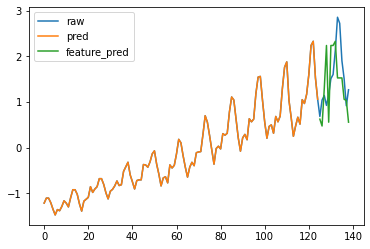

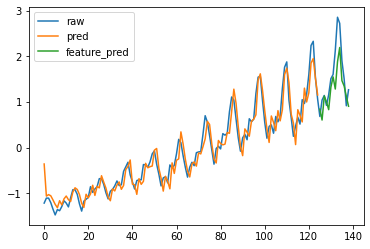

In [6]:
# 評価

## cart
plt.figure()
plt.plot(raw_y, label='raw')
plt.plot(cart_model.predict(raw_x_train).reshape(-1, 1), label='pred')
plt.plot(range((len(raw_y)-len(cart_pred)),len(raw_y)),cart_pred, label='feature_pred')
plt.legend()
plt.show()

## esn
plt.figure()
plt.plot(raw_y, label='raw')
plt.plot(esn_model.predict(raw_x_train).reshape(-1, 1), label='pred')
plt.plot(range((len(raw_y)-len(esn_pred)),len(raw_y)),esn_pred, label='feature_pred')
plt.legend()
plt.show()

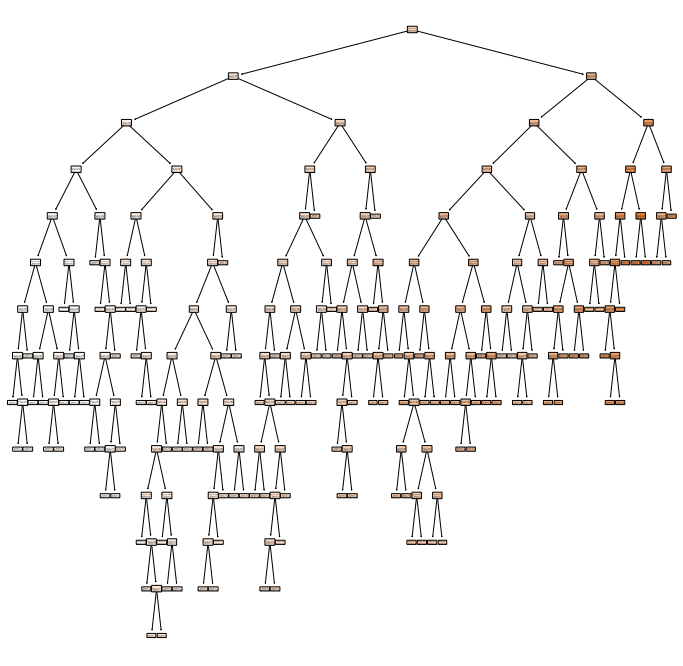

In [7]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

## CART
plt.figure(figsize=(12,12))
plot_tree(
    cart_model,
    filled=True, rounded=True
)
plt.show()